In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("../output/1000000_0.75_0.7_0.005_customers.csv").set_index("id")
q_data = pd.read_csv("../output/1000000_0.75_0.7_0.005_queues.csv").set_index("time")

In [35]:
data.fillna(np.inf, inplace=True)
data["tired_time"] = data.arrival_time + data.tiredness_limit
data["is_tired"] = data.tired_time < data.serving_end_time
data["leave_time"] = data[["serving_end_time", "tired_time"]].min(axis=1)
data["total_time"] = data.leave_time - data.arrival_time
data

priority  desired_category  tiredness_limit  arrival_time  \
id                                                                   
1               0                 0              285             1   
2               0                 1              187             5   
3               0                 3              484             6   
4               1                 3               24             8   
5               0                 2              401            11   
...           ...               ...              ...           ...   
999996          4                 1              102       1334719   
999997          0                 3               49       1334721   
999998          3                 1               18       1334722   
999999          1                 0               10       1334722   
1000000         1                 3              197       1334724   

         receiption_start_time  receiption_end_time  serving_start_time  \
id                                                                        
1                          1.0                  1.0                 1.0   
2                          5.0                  5.0                 5.0   
3                          6.0                  6.0                 6.0   
4                          8.0                  8.0                 8.0   
5                         11.0                 11.0                11.0   
...                        ...                  ...                 ...   
999996               1334722.0            1334724.0                 inf   
999997                     inf                  inf                 inf   
999998               1334724.0            1334724.0                 inf   
999999               1334724.0            1334724.0                 inf   
1000000              1334724.0                  inf                 inf   

         serving_end_time  tired_time  is_tired  leave_time  total_time  
id                                                                       
1                     4.0         286     False         4.0         3.0  
2                    27.0         192     False        27.0        22.0  
3                     9.0         490     False         9.0         3.0  
4                    13.0          32     False        13.0         5.0  
5                    13.0         412     False        13.0         2.0  
...                   ...         ...       ...         ...         ...  
999996                inf     1334821      True   1334821.0       102.0  
999997                inf     1334770      True   1334770.0        49.0  
999998                inf     1334740      True   1334740.0        18.0  
999999                inf     1334732      True   1334732.0        10.0  
1000000               inf     1334921      True   1334921.0       197.0  

[1000000 rows x 12 columns]

In [36]:
print("Mean time spent by the clients in the system:")
print(data.groupby(['priority']).total_time.mean())
print("All".ljust(5) + str(data.total_time.mean()))

Mean time spent by the clients in the system:
priority
0    97.036469
1    46.374602
2    29.596018
3    23.226204
4    21.183410
Name: total_time, dtype: float64
All  65.552954


In [37]:
data["receiption_start_time_n"] = data[["receiption_start_time", "leave_time"]].min(axis=1)
data["receiption_end_time_n"] = data[["receiption_end_time", "leave_time"]].min(axis=1)
data["serving_start_time_n"] = data[["serving_start_time", "leave_time"]].min(axis=1)
data["serving_end_time_n"] = data[["serving_end_time", "leave_time"]].min(axis=1)

data["receiption_wait_q_time"] = data["receiption_start_time_n"] - data["arrival_time"]
data["receiption_service_time"] = data["receiption_end_time_n"] - data["receiption_start_time_n"]
data["receiption_wait_time"] = data["receiption_service_time"] + data["receiption_wait_q_time"]

data["serving_wait_q_time"] = data["serving_start_time_n"] - data["receiption_end_time_n"]
data["serving_service_time"] = data["serving_end_time_n"] - data["serving_start_time_n"]
data["serving_wait_time"] = data["serving_service_time"] + data["serving_wait_q_time"]

data["wait_q_time"] = data["receiption_wait_q_time"] + data["serving_wait_q_time"]
data["service_time"] = data["receiption_service_time"] + data["serving_service_time"]

data.drop(columns=["receiption_start_time_n", "receiption_end_time_n", "serving_start_time_n", "serving_end_time_n"], inplace=True)
data

priority  desired_category  tiredness_limit  arrival_time  \
id                                                                   
1               0                 0              285             1   
2               0                 1              187             5   
3               0                 3              484             6   
4               1                 3               24             8   
5               0                 2              401            11   
...           ...               ...              ...           ...   
999996          4                 1              102       1334719   
999997          0                 3               49       1334721   
999998          3                 1               18       1334722   
999999          1                 0               10       1334722   
1000000         1                 3              197       1334724   

         receiption_start_time  receiption_end_time  serving_start_time  \
id                                                                        
1                          1.0                  1.0                 1.0   
2                          5.0                  5.0                 5.0   
3                          6.0                  6.0                 6.0   
4                          8.0                  8.0                 8.0   
5                         11.0                 11.0                11.0   
...                        ...                  ...                 ...   
999996               1334722.0            1334724.0                 inf   
999997                     inf                  inf                 inf   
999998               1334724.0            1334724.0                 inf   
999999               1334724.0            1334724.0                 inf   
1000000              1334724.0                  inf                 inf   

         serving_end_time  tired_time  is_tired  leave_time  total_time  \
id                                                                        
1                     4.0         286     False         4.0         3.0   
2                    27.0         192     False        27.0        22.0   
3                     9.0         490     False         9.0         3.0   
4                    13.0          32     False        13.0         5.0   
5                    13.0         412     False        13.0         2.0   
...                   ...         ...       ...         ...         ...   
999996                inf     1334821      True   1334821.0       102.0   
999997                inf     1334770      True   1334770.0        49.0   
999998                inf     1334740      True   1334740.0        18.0   
999999                inf     1334732      True   1334732.0        10.0   
1000000               inf     1334921      True   1334921.0       197.0   

         receiption_wait_q_time  receiption_service_time  \
id                                                         
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
5                           0.0                      0.0   
...                         ...                      ...   
999996                      3.0                      2.0   
999997                     49.0                      0.0   
999998                      2.0                      0.0   
999999                      2.0                      0.0   
1000000                     0.0                    197.0   

         receiption_wait_time  serving_wait_q_time  serving_service_time  \
id                                                                         
1                         0.0                  0.0                   3.0   
2                         0.0                  0.0                  22.0   
3                         0.0                  0.0           

In [38]:
print("Mean time spent by the clients in the queues:")
print(data.groupby(['priority']).wait_q_time.mean())
print("All".ljust(5) + str(data.wait_q_time.mean()))

Mean time spent by the clients in the queues:
priority
0    91.379179
1    35.652586
2    16.402818
3     9.282498
4     6.878505
Name: wait_q_time, dtype: float64
All  56.484703


In [39]:
print("Tired clients count = ", f"{data.is_tired.sum():>8}")
print("Out of =              ", f"{len(data):>8}")
print("Percentage =          ", f"{f'{data.is_tired.sum() / len(data):.02%}':>8}")

Tired clients count =    328484
Out of =                1000000
Percentage =             32.85%


In [40]:
q_data.mean()

receiption    13.308282
q0             2.407975
q1            19.679448
q2             0.214724
q3             6.265337
dtype: float64

<AxesSubplot:xlabel='time'>

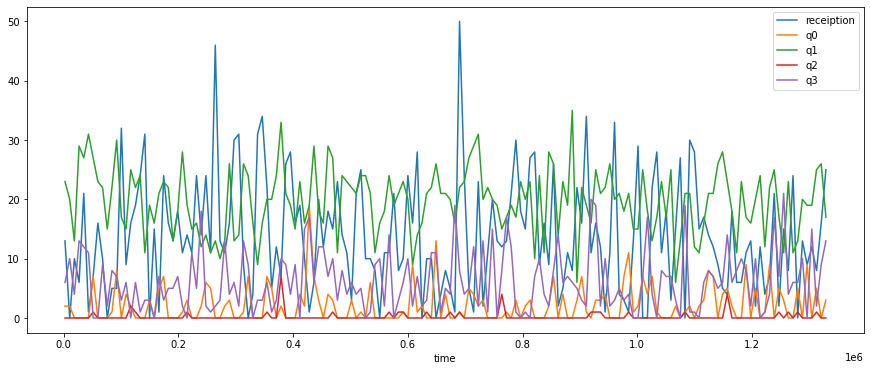

In [41]:
REDUCE_RATE = 4
q_data.iloc[::REDUCE_RATE, :].plot(figsize=(15,6))

<BarContainer object of 100 artists>

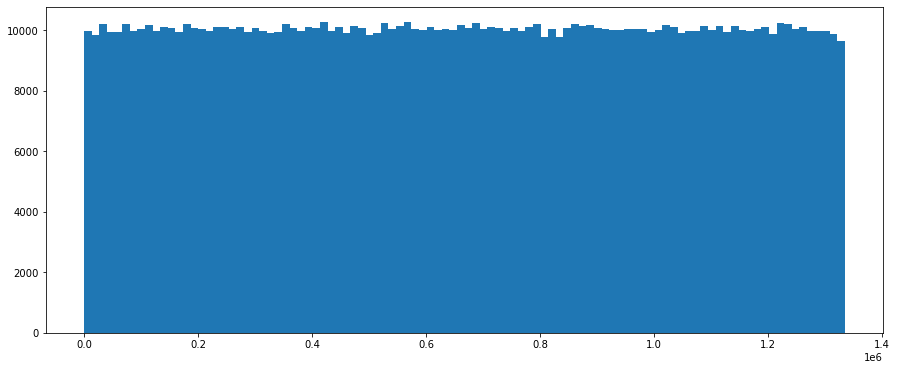

In [42]:
# Frequency of people in the system

max_leave_time = data.leave_time.max()
TIME_RANGE_COUNT = 100
time_step = max_leave_time / TIME_RANGE_COUNT
xs = list()
hs = list()
for i in range(TIME_RANGE_COUNT):
    range_start = i * time_step
    range_end = max_leave_time if i == TIME_RANGE_COUNT - 1 else (i + 1) * time_step

    xs.append(range_start)
    hs.append(len(data.loc[(data.arrival_time < range_end) & (range_start < data.leave_time)]))
xs.append(range_end)
xs = np.array(xs)
hs = np.array(hs)
plt.subplots(figsize=(15,6))
plt.bar(xs[:-1], hs, width=xs[1:] - xs[:-1], align='edge')

In [43]:
def show_histograms(datas, titles):
    fig, axs = plt.subplots(len(datas), sharex=True, figsize=(15,10))
    for i, times in enumerate(datas):
        axs[i].set_title(titles[i])
        axs[i].hist(times, bins=20)
    return fig

Text(0.5, 0.98, 'Service Time Frequency of Different Priorities')

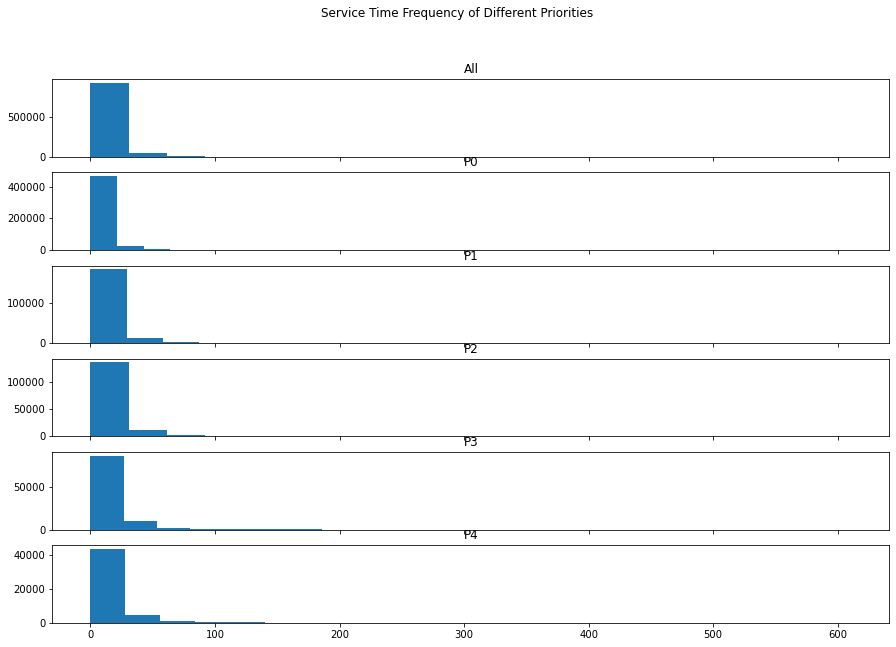

In [44]:
fig = show_histograms(
    [data.service_time] + [data.service_time[data.priority==i] for i in range(5)],
    ["All"] + [f"P{i}" for i in range(5)])
fig.suptitle("Service Time Frequency of Different Priorities")

Text(0.5, 0.98, 'Wait Time in Queue Frequency of Different Priorities')

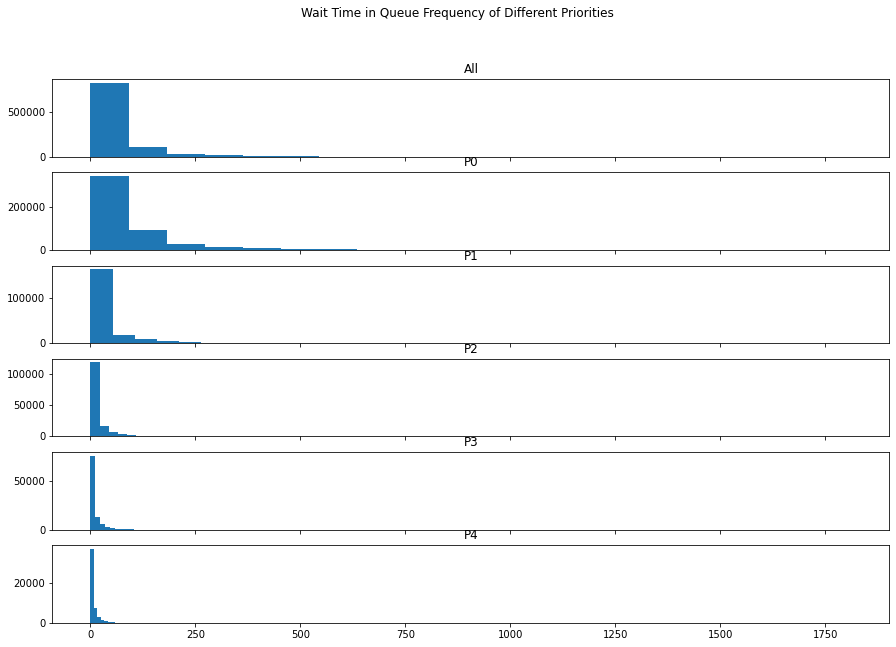

In [45]:
fig = show_histograms(
    [data.wait_q_time] + [data.wait_q_time[data.priority==i] for i in range(5)],
    ["All"] + [f"P{i}" for i in range(5)])
fig.suptitle("Wait Time in Queue Frequency of Different Priorities")